<a href="https://colab.research.google.com/github/Gustavorma/LogTech/blob/main/Preview_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 Parte**: Adicionando as bibliotecas e os dataframes, modificando e consolidando a base.



In [4]:
#Bibliotecas para rodar o código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install pulp
from pulp import * #Todas as funções da biblioteca

from google.colab import files #Fazer o download do arquivo CSV


### **1.1**: Abrindo os dataframes e fazendo alguns tratamentos iniciais, como por exemplo, renomear algumas colunas e consolidar em um único dataframe.

In [5]:
#Habilitando a abertura de dados que estão no Google Drive (inserindo os dados)
from google.colab import drive
drive.mount ('/content/drive')

file = '/content/drive/My Drive/Fatec/6° Semestre/Tecnologia da Informação aplicada à Logística/API/Dados/'

#Abrindo os arquivos csv
Rotas = pd.read_csv(file+ 'Rotas.csv', sep = ';', decimal =',')

Clientes = pd.read_csv(file+ 'Clientes.csv', sep = ',', decimal = '.')
Clientes.rename(columns={'LAT': 'LAT_CLIENTES', 'LONG': 'LONG_CLIENTES'}, inplace=True) #Renomenado as colunas latitude e longitute para ficar mais didático a leitura dos dados

Fabricas = pd.read_csv(file+ 'Fabricas.csv', sep = ',', decimal = '.', encoding='latin1')
Fabricas.rename(columns={'LAT': 'LAT_FAB', 'LONG': 'LONG_FAB'}, inplace=True) #Df Fabricas

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Checagem dos arquivos: Arquivo "Rotas"
Rotas.info()
print(Rotas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106262 entries, 0 to 106261
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Dt.Emissao   106262 non-null  object 
 1   Dt.Entrega   106262 non-null  object 
 2   Mes.Base     106262 non-null  int64  
 3   Ano.Exec     106262 non-null  int64  
 4   CO.Fabrica   106262 non-null  int64  
 5   CO.Cliente   106262 non-null  int64  
 6   Incoterm     106262 non-null  object 
 7   Veiculo      106262 non-null  object 
 8   Qtd/pallets  106262 non-null  int64  
 9   Qtd.Transp   106262 non-null  int64  
 10  Moeda        106262 non-null  object 
 11  Vlr.Frete    106262 non-null  object 
 12  Dist         106262 non-null  float64
dtypes: float64(1), int64(6), object(6)
memory usage: 10.5+ MB
        Dt.Emissao  Dt.Entrega  Mes.Base  Ano.Exec  CO.Fabrica  CO.Cliente  \
0       01/01/2023  05/01/2023         1      2023     3423909        2311   
1       01/01/2023  03/01

In [7]:
#Checagem dos arquivos: Arquivo "Clientes"
Clientes.info()
print(Clientes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO.Cliente     51 non-null     int64  
 1   MUN            51 non-null     object 
 2   LAT_CLIENTES   51 non-null     float64
 3   LONG_CLIENTES  51 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB
    CO.Cliente                    MUN  LAT_CLIENTES  LONG_CLIENTES
0         2301               VALINHOS    -22.951880     -47.027790
1         2302               CAMPINAS    -22.894290     -47.058220
2         2303               CAMPINAS    -22.926340     -47.039740
3         2304               CAMPINAS    -22.833090     -47.079430
4         2305               CAMPINAS    -22.823070     -47.078180
5         2306               VALINHOS    -22.975090     -47.014780
6         2307               CAMPINAS    -22.949560     -47.092680
7         2308               CAMPINA

In [8]:
#Checagem dos arquivos: Arquivo "Fabricas"
Fabricas.info()
print(Fabricas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CO.Fabrica  3 non-null      int64  
 1   NO_MUN      3 non-null      object 
 2   NO_MUN_MIN  3 non-null      object 
 3   SG_UF       3 non-null      object 
 4   LAT_FAB     3 non-null      float64
 5   LONG_FAB    3 non-null      float64
dtypes: float64(2), int64(1), object(3)
memory usage: 272.0+ bytes
   CO.Fabrica      NO_MUN  NO_MUN_MIN SG_UF    LAT_FAB   LONG_FAB
0     3423909         ITU         Itu    SP -23.251784 -47.343908
1     3403208  ARARAQUARA  Araraquara    SP -21.820935 -48.172327
2     3424402     JACAREI     Jacareí    SP -23.287136 -45.984976


In [9]:
#Mesclar a base
Base = Rotas.merge(Clientes, left_on='CO.Cliente',
                right_on='CO.Cliente',
                how='inner').merge(Fabricas, left_on='CO.Fabrica',
                                   right_on='CO.Fabrica',
                                   how='inner')

In [10]:
# Checagem final
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106262 entries, 0 to 106261
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Dt.Emissao     106262 non-null  object 
 1   Dt.Entrega     106262 non-null  object 
 2   Mes.Base       106262 non-null  int64  
 3   Ano.Exec       106262 non-null  int64  
 4   CO.Fabrica     106262 non-null  int64  
 5   CO.Cliente     106262 non-null  int64  
 6   Incoterm       106262 non-null  object 
 7   Veiculo        106262 non-null  object 
 8   Qtd/pallets    106262 non-null  int64  
 9   Qtd.Transp     106262 non-null  int64  
 10  Moeda          106262 non-null  object 
 11  Vlr.Frete      106262 non-null  object 
 12  Dist           106262 non-null  float64
 13  MUN            106262 non-null  object 
 14  LAT_CLIENTES   106262 non-null  float64
 15  LONG_CLIENTES  106262 non-null  float64
 16  NO_MUN         106262 non-null  object 
 17  NO_MUN_MIN     106262 non-nul

In [11]:
#Visualiza o df final
pd.set_option('display.max_columns', None) #Define a opção de exibir todas as colunas
Base.head(5)

,Dt.Emissao,Dt.Entrega,Mes.Base,Ano.Exec,CO.Fabrica,CO.Cliente,Incoterm,Veiculo,Qtd/pallets,Qtd.Transp,Moeda,Vlr.Frete,Dist,MUN,LAT_CLIENTES,LONG_CLIENTES,NO_MUN,NO_MUN_MIN,SG_UF,LAT_FAB,LONG_FAB
0,01/01/2023,05/01/2023,1,2023,3423909,2311,FOB,P24,24,3600,BRL,0,71.38,PIRACICABA,-22.74145,-47.60181,ITU,Itu,SP,-23.251784,-47.343908
1,02/01/2023,05/01/2023,1,2023,3423909,2311,FOB,P12,12,1500,BRL,0,71.38,PIRACICABA,-22.74145,-47.60181,ITU,Itu,SP,-23.251784,-47.343908
2,02/01/2023,05/01/2023,1,2023,3423909,2311,FOB,P24,24,3600,BRL,0,71.38,PIRACICABA,-22.74145,-47.60181,ITU,Itu,SP,-23.251784,-47.343908
3,02/01/2023,06/01/2023,1,2023,3423909,2311,FOB,P24,24,3600,BRL,0,71.38,PIRACICABA,-22.74145,-47.60181,ITU,Itu,SP,-23.251784,-47.343908
4,03/01/2023,07/01/2023,1,2023,3423909,2311,FOB,P24,24,2400,BRL,0,71.38,PIRACICABA,-22.74145,-47.60181,ITU,Itu,SP,-23.251784,-47.343908


In [12]:
#Alterando o nome das fabricas e ID dos clientes

Base['CO.Fabrica'] = Base['CO.Fabrica'].replace({3423909: 1, 3403208: 2, 3424402: 3}) #Alterar o nome das fábricas

Base['CO.Cliente'] = Base['CO.Cliente'].astype(str).apply(lambda x: x[2:] if len(x) > 2 else x) #Alterar o ID dos clientes
Base['CO.Cliente'] = Base['CO.Cliente'].astype(int)

print(Base)

        Dt.Emissao  Dt.Entrega  Mes.Base  Ano.Exec  CO.Fabrica  CO.Cliente  \
0       01/01/2023  05/01/2023         1      2023           1          11   
1       02/01/2023  05/01/2023         1      2023           1          11   
2       02/01/2023  05/01/2023         1      2023           1          11   
3       02/01/2023  06/01/2023         1      2023           1          11   
4       03/01/2023  07/01/2023         1      2023           1          11   
...            ...         ...       ...       ...         ...         ...   
106257  16/11/2023  21/11/2023        11      2023           3          36   
106258  23/11/2023  28/11/2023        11      2023           3          36   
106259  23/11/2023  28/11/2023        11      2023           3          36   
106260  24/11/2023  27/11/2023        11      2023           3          36   
106261  01/12/2023  05/12/2023        12      2023           3          36   

       Incoterm Veiculo  Qtd/pallets  Qtd.Transp Moeda Vlr.Fret

In [13]:
#Valores únicos de CO.Cliente e CO.Fabrica
clientes_unicos = sorted(Base['CO.Cliente'].unique())
fabricas_unicas = Base['CO.Fabrica'].unique()

# Imprimir valores únicos
print("Código orginal das fábricas: 1 = 3423909, 2= 3403208 e 3 = 3424402")
print("Fábricas:", fabricas_unicas)
print("Clientes:", clientes_unicos)

Código orginal das fábricas: 1 = 3423909, 2= 3403208 e 3 = 3424402
Fábricas: [1 2 3]
Clientes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


In [14]:
#Criar o novo índice no formato Xij como uma nova coluna
Base['Xij'] = 'X' + Base['CO.Fabrica'].astype(str) + Base['CO.Cliente'].astype(str).str.zfill(2)

#Valores únicos de Xij
Xij_unicos = sorted(Base['Xij'].unique())
print("Xij únicos", Xij_unicos)

Xij únicos ['X105', 'X108', 'X109', 'X110', 'X111', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X147', 'X148', 'X149', 'X150', 'X151', 'X201', 'X202', 'X203', 'X204', 'X205', 'X206', 'X207', 'X208', 'X209', 'X210', 'X211', 'X212', 'X213', 'X214', 'X215', 'X216', 'X217', 'X218', 'X219', 'X220', 'X221', 'X222', 'X223', 'X224', 'X225', 'X226', 'X227', 'X228', 'X229', 'X230', 'X231', 'X232', 'X233', 'X234', 'X235', 'X239', 'X240', 'X241', 'X242', 'X243', 'X244', 'X245', 'X246', 'X247', 'X248', 'X249', 'X250', 'X251', 'X301', 'X302', 'X303', 'X304', 'X305', 'X306', 'X307', 'X308', 'X309', 'X310', 'X311', 'X319', 'X320', 'X321', 'X322', 'X323', 'X324', 'X325', 'X326', 'X327', 'X328', 'X329', 'X330', 'X331', 'X332', 'X333', 'X334', 'X335', 'X336', 'X337', 'X338', 'X344', 'X345', 'X346', 'X347', 'X348', 'X349', 'X350', 'X351']


### **1.2 Parte**: adicionando as colunas de capacidade, produtividade e frete/unidade e abaixando o csv consolidado.

In [15]:
#Cria nova: coluna condicional (Capacidade dos veículos)
Base['Capacidade'] = None
Base.loc[Base['Veiculo'] == 'P24', 'Capacidade'] = 3600
Base.loc[Base['Veiculo'] == 'P12', 'Capacidade'] = 1800

In [16]:
#Cria nova coluna: Produtividade
Base['Produtividade'] = pd.to_numeric(Base['Qtd.Transp'] / Base['Capacidade'] * 100).round(2)
print(Base)

        Dt.Emissao  Dt.Entrega  Mes.Base  Ano.Exec  CO.Fabrica  CO.Cliente  \
0       01/01/2023  05/01/2023         1      2023           1          11   
1       02/01/2023  05/01/2023         1      2023           1          11   
2       02/01/2023  05/01/2023         1      2023           1          11   
3       02/01/2023  06/01/2023         1      2023           1          11   
4       03/01/2023  07/01/2023         1      2023           1          11   
...            ...         ...       ...       ...         ...         ...   
106257  16/11/2023  21/11/2023        11      2023           3          36   
106258  23/11/2023  28/11/2023        11      2023           3          36   
106259  23/11/2023  28/11/2023        11      2023           3          36   
106260  24/11/2023  27/11/2023        11      2023           3          36   
106261  01/12/2023  05/12/2023        12      2023           3          36   

       Incoterm Veiculo  Qtd/pallets  Qtd.Transp Moeda Vlr.Fret

In [17]:
#Adicionar coluna: Frete/unidade
Base['Vlr.Frete'] = Base['Vlr.Frete'].astype(float)
Base['Frete/unidade'] = (Base['Vlr.Frete'] / Base['Qtd.Transp']).round(2)

pd.set_option('display.max_columns', None)
print(Base)

        Dt.Emissao  Dt.Entrega  Mes.Base  Ano.Exec  CO.Fabrica  CO.Cliente  \
0       01/01/2023  05/01/2023         1      2023           1          11   
1       02/01/2023  05/01/2023         1      2023           1          11   
2       02/01/2023  05/01/2023         1      2023           1          11   
3       02/01/2023  06/01/2023         1      2023           1          11   
4       03/01/2023  07/01/2023         1      2023           1          11   
...            ...         ...       ...       ...         ...         ...   
106257  16/11/2023  21/11/2023        11      2023           3          36   
106258  23/11/2023  28/11/2023        11      2023           3          36   
106259  23/11/2023  28/11/2023        11      2023           3          36   
106260  24/11/2023  27/11/2023        11      2023           3          36   
106261  01/12/2023  05/12/2023        12      2023           3          36   

       Incoterm Veiculo  Qtd/pallets  Qtd.Transp Moeda  Vlr.Fre

In [18]:
# Exportar a base para CSV
Base.to_csv('Base_tratada.csv', index=False, sep=";", decimal=",")
files.download('Base_tratada.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **1.3**: Criando gráfico da distribuição dos Incoterms.

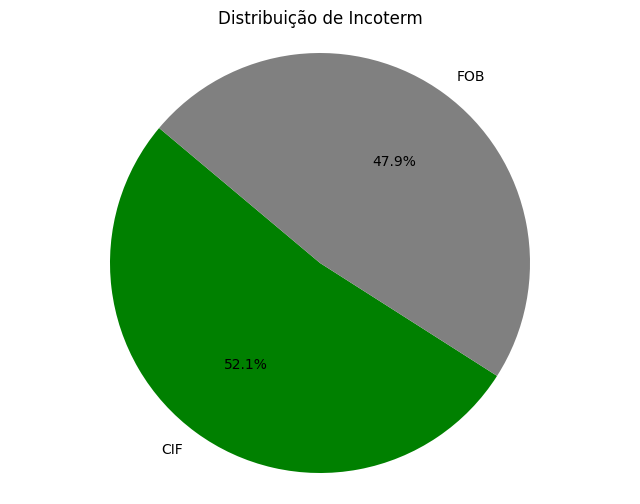

In [19]:
def plotar_grafico_pizza(Base):

    contagem_incoterm = Base['Incoterm'].value_counts()     # Conta a quantidade de ocorrências de cada tipo de Incoterm

    # Define as cores das fatias
    cores = ['green', 'grey']  # FOB: verde, CIF: cinza

    # Cria o gráfico de pizza com as cores personalizadas e texto em branco
    plt.figure(figsize=(8, 6))
    plt.pie(contagem_incoterm, labels=contagem_incoterm.index, autopct='%1.1f%%', startangle=140, colors=cores)
    plt.title('Distribuição de Incoterm')
    plt.axis('equal')  #Garante que o gráfico de pizza seja desenhado como um círculo.
    plt.show()

# Chama a função para plotar o gráfico de pizza com base na coluna 'Incoterm' do DataFrame 'Base'
plotar_grafico_pizza(Base)

In [20]:
#Gerando o dataframe que demonstre todas as relações CIF e FOB por fábrica e cliente

def criar_df_agrupado(Base):
    # Agrupamento dos dados pelo índice Xij e contagem de ocorrências de cada tipo de Incoterm em cada grupo
    agrupado = Base.groupby('Xij')['Incoterm'].value_counts().unstack(fill_value=0)

    # Cálculo dos percentuais de CIF e FOB em cada grupo
    agrupado['Total'] = agrupado['CIF'] + agrupado['FOB']
    agrupado['CIF_percentual'] = round((agrupado['CIF'] / agrupado['Total']) * 100, 4)
    agrupado['FOB_percentual'] = round((agrupado['FOB'] / agrupado['Total']) * 100, 4)

    return agrupado

# Chama a função para criar o DataFrame agrupado por Xij
fob_cif = criar_df_agrupado(Base)

# Renomear o DataFrame para "Xij"
fob_cif.rename_axis('Xij', axis=0, inplace=True)

# Renomear o rótulo do índice para None
fob_cif = fob_cif.rename_axis(None)

# Exibe o DataFrame
print(fob_cif)

Incoterm   CIF  FOB  Total  CIF_percentual  FOB_percentual
X105       667  102    769         86.7360         13.2640
X108       625   95    720         86.8056         13.1944
X109       365   30    395         92.4051          7.5949
X110      1222   24   1246         98.0738          1.9262
X111       644   90    734         87.7384         12.2616
...        ...  ...    ...             ...             ...
X347       667  114    781         85.4033         14.5967
X348       542   82    624         86.8590         13.1410
X349         4  774    778          0.5141         99.4859
X350       595   77    672         88.5417         11.4583
X351         3  836    839          0.3576         99.6424

[117 rows x 5 columns]


In [21]:
#Download das relações FOB/CIF
fob_cif.to_csv('fob_cif.csv', index=True, sep=";", decimal=",")
files.download('fob_cif.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
#Calculando o custo ajustado para a FO

Custo = Base[Base['Frete/unidade'] != 0] #Desconsiderar os valores zerados

Mean = Custo.groupby('Xij')['Frete/unidade'].mean().round(2) #Calcular a média dos custos agrupados por Xij

Custo_ajustado = Mean * 1.05 #Ajustar os custos com uma margem de 5%

# Arredondar os valores para duas casas decimais
Custo_ajustado = Custo_ajustado.round(2)

# Criar um novo dataframe com os valores ajustados
Custo_ajustado = pd.DataFrame({'Xij': Custo_ajustado.index,
                        'Frete/unidade': Custo_ajustado.values,
                        'Custo_Medio_Ajustado': Custo_ajustado * 1.05}) # Multiplicar por 1.05 para adicionar 5%

# Arredondar os valores para duas casas decimais
Custo_ajustado = Custo_ajustado.round(2)

# Salvar o novo DataFrame em um arquivo separado (por exemplo, CSV)
Custo_ajustado.to_csv('custos_medios_ajustados.csv', index=False)

# Exibir o novo DataFrame
print(Custo_ajustado)

       Xij  Frete/unidade  Custo_Medio_Ajustado
Xij                                            
X105  X105           0.27                  0.28
X108  X108           0.27                  0.28
X109  X109           0.28                  0.29
X110  X110           0.32                  0.34
X111  X111           0.28                  0.29
...    ...            ...                   ...
X347  X347           0.94                  0.99
X348  X348           1.02                  1.07
X349  X349           1.11                  1.17
X350  X350           1.07                  1.12
X351  X351           1.13                  1.19

[117 rows x 3 columns]


In [23]:
#Download das relações Custo_ajustado
Custo_ajustado.to_csv('Custo_ajustado.csv', index=False, sep=";", decimal=",")
files.download('Custo_ajustado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
#Adicionando o df com os valores de frete modificados
Custo_mod = pd.read_csv(file+ 'Custo_mod.csv', sep = ';', decimal = ',')
Custo_mod.info()
Custo_mod.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Xij                   153 non-null    object 
 1   Frete/unidade         153 non-null    float64
 2   Custo_Medio_Ajustado  153 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.7+ KB


,Xij,Frete/unidade,Custo_Medio_Ajustado
0,X101,1.000000e+09,1.000000e+09
1,X102,1.000000e+09,1.000000e+09
2,X103,1.000000e+09,1.000000e+09
3,X104,1.000000e+09,1.000000e+09
4,X105,2.700000e-01,2.800000e-01


In [25]:
# Criar um dicionário para armazenar todas as variáveis únicas
variaveis_unicas = {}

# Adicionar as variáveis únicas do DataFrame original
for var in Base['Xij'].unique():
    variaveis_unicas[var] = None

# Adicionar as variáveis únicas do DataFrame novo (após o acerto)
for var in Custo_mod['Xij'].unique():
    variaveis_unicas[var] = None

# Exibir o dicionário com todas as variáveis únicas
print(variaveis_unicas)

{'X111': None, 'X133': None, 'X147': None, 'X132': None, 'X131': None, 'X124': None, 'X125': None, 'X127': None, 'X126': None, 'X135': None, 'X128': None, 'X129': None, 'X130': None, 'X108': None, 'X139': None, 'X149': None, 'X105': None, 'X151': None, 'X137': None, 'X142': None, 'X110': None, 'X150': None, 'X143': None, 'X141': None, 'X140': None, 'X148': None, 'X134': None, 'X138': None, 'X109': None, 'X136': None, 'X211': None, 'X233': None, 'X247': None, 'X232': None, 'X221': None, 'X220': None, 'X231': None, 'X223': None, 'X224': None, 'X225': None, 'X227': None, 'X226': None, 'X235': None, 'X228': None, 'X229': None, 'X206': None, 'X203': None, 'X201': None, 'X207': None, 'X230': None, 'X202': None, 'X208': None, 'X239': None, 'X249': None, 'X217': None, 'X205': None, 'X251': None, 'X214': None, 'X213': None, 'X242': None, 'X210': None, 'X246': None, 'X218': None, 'X250': None, 'X219': None, 'X212': None, 'X243': None, 'X244': None, 'X241': None, 'X240': None, 'X248': None, 'X234

# **Parte 2:** Pesquisa operacional (aplicação do método de transportes).

## **Parte 2.1:** Criando a problemática e inserindo os dados das restrições

In [26]:
#Inserindo os dados das restrições: Capacidade
Capacidade = pd.read_csv(file+ 'Capacidade.csv', sep = ';', decimal = '.')
Capacidade['CO.Fabrica'] = Capacidade['CO.Fabrica'].replace({3423909: 1, 3403208: 2, 3424402: 3}) #Alterar o nome das fábricas

#Inserindo os dados das restrições: Demanda
Demanda = pd.read_csv(file+ 'Demanda.csv', sep = ';', decimal = '.')
Demanda['CO.Cliente'] = Demanda['CO.Cliente'].astype(str).apply(lambda x: x[2:] if len(x) > 2 else x) #Alterar o ID dos clientes
Demanda['CO.Cliente'] = Demanda['CO.Cliente'].astype(int)
Demanda['Demanda_ajustada'] = (Demanda['Demanda'] * 0.521).round(decimals=0).astype(int) #Criando a coluna com a demanda ajustada de acordo com os dados CIF

print(Capacidade)
print(Demanda)

#Criando e definindo o tipo de problema
problem = LpProblem('Minimizacao_de_custos_operacionais', LpMinimize)

   CO.Fabrica  Capacidade
0           1    56000000
1           2    90000000
2           3    90000000
    CO.Cliente   Demanda  Demanda_ajustada
0            1   5973721           3112309
1            2   1778080            926380
2            3   5958798           3104534
3            4    896173            466906
4            5   3241494           1688818
5            6   3244827           1690555
6            7  12738726           6636876
7            8   6792503           3538894
8            9   7471374           3892586
9           10   2098730           1093438
10          11   7295028           3800710
11          12   1350774            703753
12          13   1439856            750165
13          14   3977784           2072425
14          15   3666906           1910458
15          16    271034            141209
16          17   1272373            662906
17          18    569236            296572
18          19   1589336            828044
19          20   5063433           2

In [27]:
# Criando as variáveis de decisão
x = LpVariable.dicts("Envios", [(i, j) for i in Capacidade['CO.Fabrica'] for j in Demanda['CO.Cliente']],
                     lowBound=0, cat='Continuous')

## **Parte 2.2:** Criando as restrições do problema

In [28]:
# Adicionando as restrições de capacidade das fábricas
for i, row in Capacidade.iterrows():
    problem += lpSum(x[(row['CO.Fabrica'], j)] for j in Demanda['CO.Cliente']) <= row['Capacidade'], f"Capacidade_Fabrica_{row['CO.Fabrica']}"

# Adicionando as restrições de demanda dos clientes
for j, row in Demanda.iterrows():
  problem += lpSum(x[(i, row['CO.Cliente'])] for i in Capacidade['CO.Fabrica']) == row['Demanda_ajustada'], f"Demanda_Cliente_{row['CO.Cliente']}"

## **Parte 2.2:** Criando a Função Objetivo.

In [29]:
# Garantir que Custo_ajustado tem MultiIndex
Custo_mod = Custo_mod.set_index(['Xij'])

# Criar dicionário a partir do DataFrame Custo_ajustado
custo_dict = Custo_mod['Custo_Medio_Ajustado'].to_dict()

# Criando e definindo o tipo de problema
problem = LpProblem('Minimizacao_de_custos_operacionais', LpMinimize)

# Criando as variáveis de decisão
x = LpVariable.dicts("Envios", [(i, j) for i in Capacidade['CO.Fabrica'] for j in Demanda['CO.Cliente']],
                     lowBound=0, cat='Continuous')

# Adicionando as restrições de capacidade das fábricas
for i, row in Capacidade.iterrows():
    problem += lpSum(x[(row['CO.Fabrica'], j)] for j in Demanda['CO.Cliente']) <= row['Capacidade'], f"Capacidade_Fabrica_{row['CO.Fabrica']}"

# Adicionando as restrições de demanda dos clientes
for j, row in Demanda.iterrows():
    problem += lpSum(x[(i, row['CO.Cliente'])] for i in Capacidade['CO.Fabrica']) >= row['Demanda'], f"Demanda_Cliente_{row['CO.Cliente']}"

# Definindo a função objetivo, considerando as combinações ausentes
problem += lpSum(x[(i, j)] * custo_dict.get(f'X{i}{str(j).zfill(2)}', 0) for i in Capacidade['CO.Fabrica'] for j in Demanda['CO.Cliente']), "Custo_Total_Transporte"

## **Parte 2.3:** Resolução

In [30]:
# Resolver o problema
problem.solve()

# Verificando o status da solução
print("Status:", LpStatus[problem.status])

# Exibindo o custo total de transporte
print("Custo Total de Transporte:", value(problem.objective))

# Exibindo as quantidades enviadas de cada fábrica para cada cliente
for i in Capacidade['CO.Fabrica']:
    for j in Demanda['CO.Cliente']:
        if x[(i, j)].varValue > 0:
            print(f"Enviar {x[(i, j)].varValue} unidades da fábrica {i} para o cliente {j}")

Status: Optimal
Custo Total de Transporte: 102737035.65
Enviar 19316039.0 unidades da fábrica 1 para o cliente 24
Enviar 1898750.0 unidades da fábrica 1 para o cliente 34
Enviar 14197671.0 unidades da fábrica 1 para o cliente 35
Enviar 1716192.0 unidades da fábrica 1 para o cliente 36
Enviar 827342.0 unidades da fábrica 1 para o cliente 37
Enviar 2539443.0 unidades da fábrica 1 para o cliente 38
Enviar 236922.0 unidades da fábrica 1 para o cliente 39
Enviar 973767.0 unidades da fábrica 1 para o cliente 40
Enviar 5304924.0 unidades da fábrica 1 para o cliente 41
Enviar 838856.0 unidades da fábrica 1 para o cliente 42
Enviar 8150094.0 unidades da fábrica 1 para o cliente 43
Enviar 5973721.0 unidades da fábrica 2 para o cliente 1
Enviar 1778080.0 unidades da fábrica 2 para o cliente 2
Enviar 5958798.0 unidades da fábrica 2 para o cliente 3
Enviar 896173.0 unidades da fábrica 2 para o cliente 4
Enviar 3241494.0 unidades da fábrica 2 para o cliente 5
Enviar 3244827.0 unidades da fábrica 2 p

In [31]:
# Inicializando listas para os dados
resultado = []

# Adicionando os resultados à lista de dados
for i in Capacidade['CO.Fabrica']:
    for j in Demanda['CO.Cliente']:
        if x[(i, j)].varValue > 0:
            resultado.append([i, j, x[(i, j)].varValue])

# Criando o dataframe
resultado = pd.DataFrame(resultado, columns=['Fabrica', 'Cliente', 'Unidades_enviadas'])

#Criar o novo índice no formato Xij como uma nova coluna
resultado['Xij'] = 'X' + resultado['Fabrica'].astype(str) + resultado['Cliente'].astype(str).str.zfill(2)

# Remover as colunas 'Fabrica' e 'Cliente'
resultado.drop(['Fabrica', 'Cliente'], axis=1, inplace=True)

# Reordenar as colunas para colocar 'Xij' antes de 'Unidades Enviadas'
resultado = resultado[['Xij', 'Unidades_enviadas']]

# Realizar o merge (junção) dos DataFrames usando 'Xij' como chave
resultado_com_custo = pd.merge(resultado, Custo_mod, on='Xij', how='left')

# Criando a nova coluna 'Custo_Total'
resultado_com_custo['Custo_Total'] = resultado_com_custo['Unidades_enviadas'] * resultado_com_custo['Custo_Medio_Ajustado']

print(resultado_com_custo)

     Xij  Unidades_enviadas  Frete/unidade  Custo_Medio_Ajustado  Custo_Total
0   X124         19316039.0           0.30                  0.32   6181132.48
1   X134          1898750.0           0.28                  0.29    550637.50
2   X135         14197671.0           0.29                  0.30   4259301.30
3   X136          1716192.0           0.51                  0.54    926743.68
4   X137           827342.0           0.49                  0.51    421944.42
5   X138          2539443.0           0.49                  0.51   1295115.93
6   X139           236922.0           0.59                  0.62    146891.64
7   X140           973767.0           0.64                  0.67    652423.89
8   X141          5304924.0           0.61                  0.64   3395151.36
9   X142           838856.0           0.60                  0.63    528479.28
10  X143          8150094.0           0.64                  0.67   5460562.98
11  X201          5973721.0           0.60                  0.63

In [32]:
#Download do resultado para validação
resultado_com_custo.to_csv('Otimizado.csv', index=False, sep=";", decimal=',')
files.download('Otimizado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>